In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

## Hansen-Jagannathan Bound


#### define sample size

In [2]:
s=10000

#### Define rare disaster rate

In [3]:
r_disaster_rate = 0.02

#### Simulate ϵ with 10000 random draws from a standard normal distribution

In [4]:
epsilon = np.random.randn(s)
epsilon

array([-3.26825993,  1.91586525,  0.12585489, ...,  0.27547818,
       -1.56154351, -0.97591191])

####  Simulate $\nu$ with 10000 random draws from a standard uniform distribution

In [5]:
mu=np.random.uniform(0,1,s)

In [6]:
mu

array([0.26866316, 0.1585852 , 0.64344   , ..., 0.78421826, 0.92376592,
       0.56431881])

#### Rare disaster $\nu$ has value of either zero (probability 98.3%) or ln(0.65) (with probability 1.7%)


In [7]:
n = []
val = np.log(0.7)
for i in mu:
    if i <= r_disaster_rate:
        n.append(val)
    else:
        n.append(0.0)
      

In [8]:
nu_values = np.array(n)
nu_values

array([0., 0., 0., ..., 0., 0., 0.])

### consumption growth has a lognormal distribution with the possibility of rare disasters:

## $\ln$$g̃$ =0.02+0.02$ϵ̃$ +$ν̃$ 

### Define $g̃$ value

In [9]:
g = []
for i in np.arange(0, s):
    g_val = np.exp(0.02 + 0.02 * epsilon[i] + nu_values[i])
    g.append(g_val)

In [10]:
G = np.array(g)

In [11]:
G

array([0.95564842, 1.0600513 , 1.02277252, ..., 1.02583772, 0.98883196,
       1.00048188])

### Calculate the mean and standard deviation of the pricing kernel for each values of 𝛾, and plot the ratio SD(M)/E(M) (on the vertical axis) vs 𝛾 (on the horizontal axis). 

### for 𝛾 in the range [0,5], in increments of 0.1 (or less).

In [17]:
gamma0 = []
ratio0 = []
for b0 in np.arange(0, 5, 0.01):
    M = 0.99*2.7182818284**(b0*(1-G))
    ratio = M.std() / M.mean()
    gamma0.append([b0])
    ratio0.append([ratio])

In [18]:
ratio = pd.DataFrame(data=ratio0)
gamma = pd.DataFrame(data=gamma0)

In [19]:
gamma = gamma.rename(columns = {0: 'gamma'}, inplace = False)
ratio  = ratio .rename(columns = {0: 'Ratio'}, inplace = False)

In [20]:
table = pd.concat([gamma,ratio],axis=1)
table

,gamma,Ratio
0,0.00,0.000000
1,0.01,0.000474
2,0.02,0.000950
3,0.03,0.001426
4,0.04,0.001904
...,...,...
495,4.95,0.473382
496,4.96,0.475085
497,4.97,0.476793
498,4.98,0.478505


In [21]:
table_above_04 = table[table.Ratio>=0.4]
table_above_04 

,gamma,Ratio
450,4.50,0.401033
451,4.51,0.402552
452,4.52,0.404075
453,4.53,0.405602
454,4.54,0.407132
455,4.55,0.408667
456,4.56,0.410206
457,4.57,0.411748
458,4.58,0.413295
459,4.59,0.414845


In [22]:
table_above_04[0:1]

,gamma,Ratio
450,4.5,0.401033


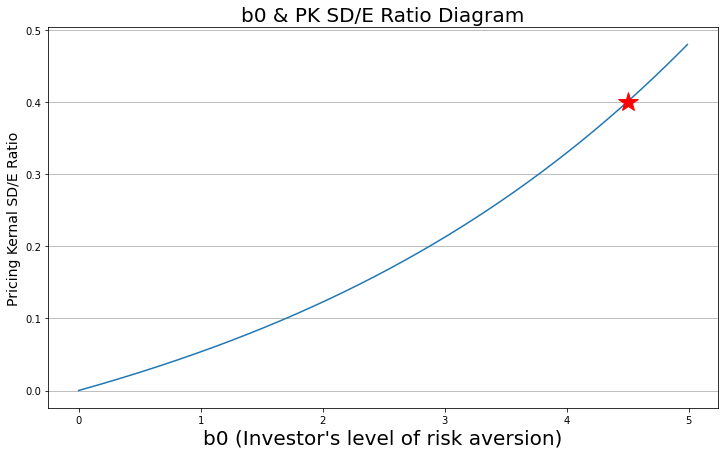

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel('b0 (Investor\'s level of risk aversion)', fontsize=20)
plt.ylabel('Pricing Kernal SD/E Ratio', fontsize=14)
plt.title('b0 & PK SD/E Ratio Diagram', fontsize=20)

plt.plot(table['gamma'], table['Ratio'])
plt.plot(table_above_04['gamma'][0:1],table_above_04['Ratio'][0:1],'b*',color = 'red',markersize=20)
plt.grid(axis='y')
plt.show()